# **Regression Project: Boston House Price Prediction**

# **Marks: 60**

Welcome to the project on regression. We will use the **Boston house price dataset** for this project.

-------------------------------
## **Objective**
-------------------------------

The problem at hand is to **predict the housing prices of a town or a suburb based on the features of the locality provided to us**. In the process, we need to **identify the most important features affecting the price of the house**. We need to employ techniques of data preprocessing and build a linear regression model that predicts the prices for the unseen data.

----------------------------
## **Dataset**
---------------------------

Each record in the database describes a house in Boston suburb or town. The data was drawn from the Boston Standard Metropolitan Statistical Area (SMSA) in 1970. Detailed attribute information can be found below:

Attribute Information:

- **CRIM:** Per capita crime rate by town
- **ZN:** Proportion of residential land zoned for lots over 25,000 sq.ft.
- **INDUS:** Proportion of non-retail business acres per town
- **CHAS:** Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
- **NOX:** Nitric Oxide concentration (parts per 10 million)
- **RM:** The average number of rooms per dwelling
- **AGE:** Proportion of owner-occupied units built before 1940
- **DIS:** Weighted distances to five Boston employment centers
- **RAD:** Index of accessibility to radial highways
- **TAX:** Full-value property-tax rate per 10,000 dollars
- **PTRATIO:** Pupil-teacher ratio by town
- **LSTAT:** % lower status of the population
- **MEDV:** Median value of owner-occupied homes in 1000 dollars

## **Importing the necessary libraries**

In [1]:
#Importing libraries for data manipulation
import pandas as pd
import numpy as np

In [2]:
#Importing libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#Importing libraries for building linear regression model
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [4]:
#Importing libraries for scaling the data
from sklearn.preprocessing import MinMaxScaler

In [5]:
#To scale the data using z-score
from sklearn.preprocessing import StandardScaler

In [6]:
#Library to split the data
from sklearn.model_selection import train_test_split

In [7]:
#Algorithms to use
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier

In [8]:
#Metrics to evaluate the model
from sklearn.metrics import confusion_matrix, classification_report, precision_recall_curve


In [9]:
#For Tuning the model
from sklearn.model_selection import GridSearchCV

In [10]:
#To ignore warnings

import warnings
warnings.filterwarnings("ignore")

### Loading the dataset

In [11]:
#Read Boston dataset
df = pd.read_csv("Boston.csv")

In [12]:
#copying the data to another variable to avoid any changes to original data
df_copy = df.copy()

## Data Overview

- Observations
- Sanity checks

In [13]:
#See the first five rows
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2


In [14]:
#Check the info of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  LSTAT    506 non-null    float64
 12  MEDV     506 non-null    float64
dtypes: float64(10), int64(3)
memory usage: 51.5 KB


- None of the columns have any null values
- There are no categorical columns
- All the columns are filled with numbers

In [15]:
#Check the number of unique values in each column
df.nunique()

CRIM       504
ZN          26
INDUS       76
CHAS         2
NOX         81
RM         446
AGE        356
DIS        412
RAD          9
TAX         66
PTRATIO     46
LSTAT      455
MEDV       229
dtype: int64

- We will not drop any columns right away since no column has a value of 1 or 506

In [16]:
#Check for duplicate values
df.duplicated().sum()

0

- There are no duplicated columns

In [17]:
#Check for null values
df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
LSTAT      0
MEDV       0
dtype: int64

- double checked to make sure no columns have a null value

## Exploratory Data Analysis (EDA)

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Questions:**

1. What does the distribution of 'MEDV' look like?
2. What can we infer form the correlation heatmap? Is there correlation between the dependent and independent variables?
3. What are all the inferences that can be found by doing univariate analysis for different variables?
4. Do bivariate analysis to visualize the relationship between the features having significant correlations (>= 0.7 or <= -0.7)

In [18]:
#Checking Summary statistics
df.describe().T

,count,mean,std,min,25%,50%,75%,max
CRIM,506.0,3.613524,8.601545,0.00632,0.082045,0.25651,3.677083,88.9762
ZN,506.0,11.363636,23.322453,0.00000,0.000000,0.00000,12.500000,100.0000
INDUS,506.0,11.136779,6.860353,0.46000,5.190000,9.69000,18.100000,27.7400
CHAS,506.0,0.069170,0.253994,0.00000,0.000000,0.00000,0.000000,1.0000
NOX,506.0,0.554695,0.115878,0.38500,0.449000,0.53800,0.624000,0.8710
RM,506.0,6.284634,0.702617,3.56100,5.885500,6.20850,6.623500,8.7800
AGE,506.0,68.574901,28.148861,2.90000,45.025000,77.50000,94.075000,100.0000
DIS,506.0,3.795043,2.105710,1.12960,2.100175,3.20745,5.188425,12.1265
RAD,506.0,9.549407,8.707259,1.00000,4.000000,5.00000,24.000000,24.0000
TAX,506.0,408.237154,168.537116,187.00000,279.000000,330.00000,666.000000,711.0000


Observations:
- Per capita crime rate has an average of 3.6 with a max of 88.97 so there may be multiple outliers in this data
- ZN had an average of 11.36 but up until the 75% it was zero so this data is skewed heavily to the right
- INDUS may have some higher values as well
- Chas looks good, value of 1 if it's on the river, 0 otherwise
- NOX the mean and 50% are very similar
- RM average of 6 beds per house and 50% of 6 as well
- AGE looks like the oldest house is 100 years old and the newest is 2.9 years
- DIS looks like the average distance is 3.7 which is close to the 50% 3.2
- RAD looks like some houses are close to the highways but some are very far
- TAX looks like some houses are fairly cheap and then the more expensive houses are upping the average
- PTRATIO the average is close to the 50%
- LSTAT this is probably similar to the TAX where the high and low income areas greatly differ
- MEDV the mean and 50% are close with the max being 50 which makes sense because of the more expensive houses

In [19]:
#Function to plot a boxplot and histogram along the same scale
def histogram_boxplot(df, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows = 2,      # Number of rows of the subplot grid = 2
        sharex = True,  # x-axis will be shared among all subplots
        gridspec_kw = {"height_ratios": (0.25, 0.75)},
        figsize = figsize,
    )                   # Creating the 2 subplots
    sns.boxplot(data = df, x = feature, ax = ax_box2, showmeans = True, color = "violet"
    )                   # Boxplot will be created and a star will indicate the mean value of    #the column
    sns.histplot(
        data = df, x = feature, kde = kde, ax = ax_hist2, bins = bins, palette = "winter"
    ) if bins else sns.histplot(
        data = df, x = feature, kde = kde, ax = ax_hist2
    )                   # For histogram
    ax_hist2.axvline(
        df[feature].mean(), color = "green", linestyle = "--"
    )                   # Add mean to the histogram
    ax_hist2.axvline(
        df[feature].median(), color = "black", linestyle = "-"
    )                   # Add median to the histogram


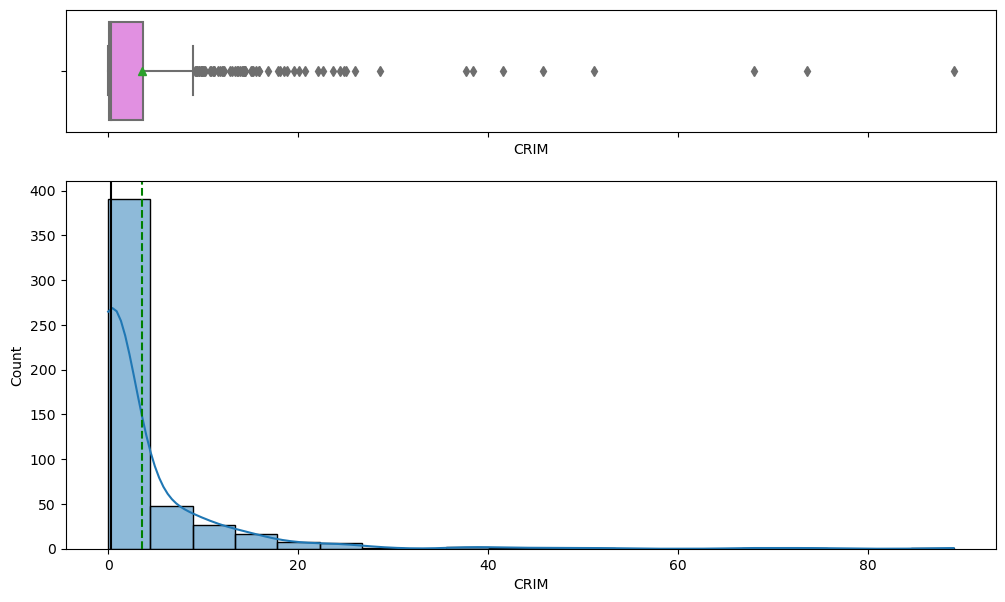

In [20]:
#Creating the histogram and boxplots for CRIM
histogram_boxplot(df, 'CRIM', kde = True, bins = 20)

- It looks like most areas don't have crime but towns that do make up most of the crime

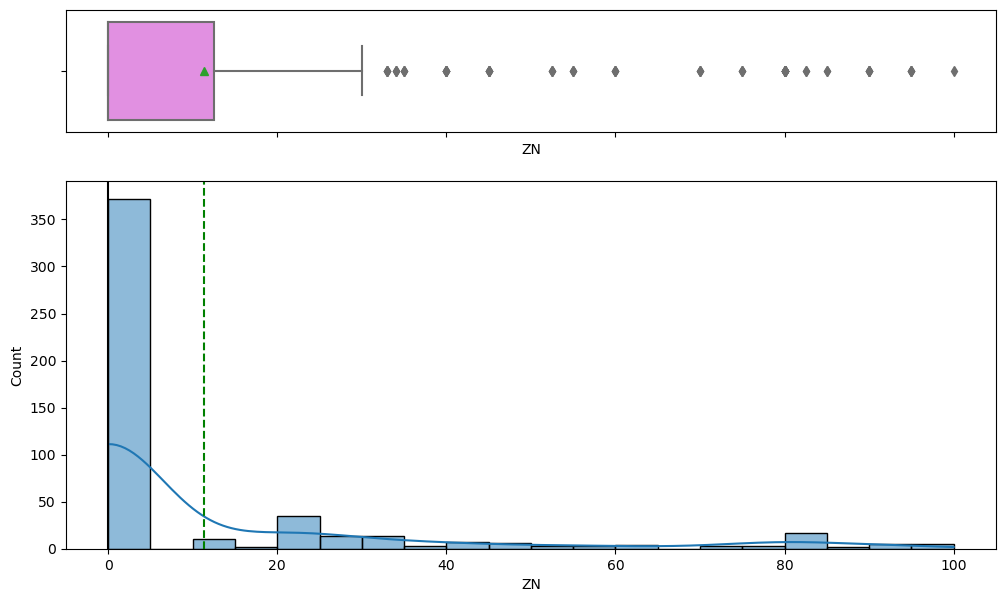

In [21]:
#Creating the histogram and boxplots for ZN
histogram_boxplot(df, 'ZN', kde = True, bins = 20)

- It looks like most areas aren't zoned for lots over 25,000 sq. ft. but the places that are affect the data

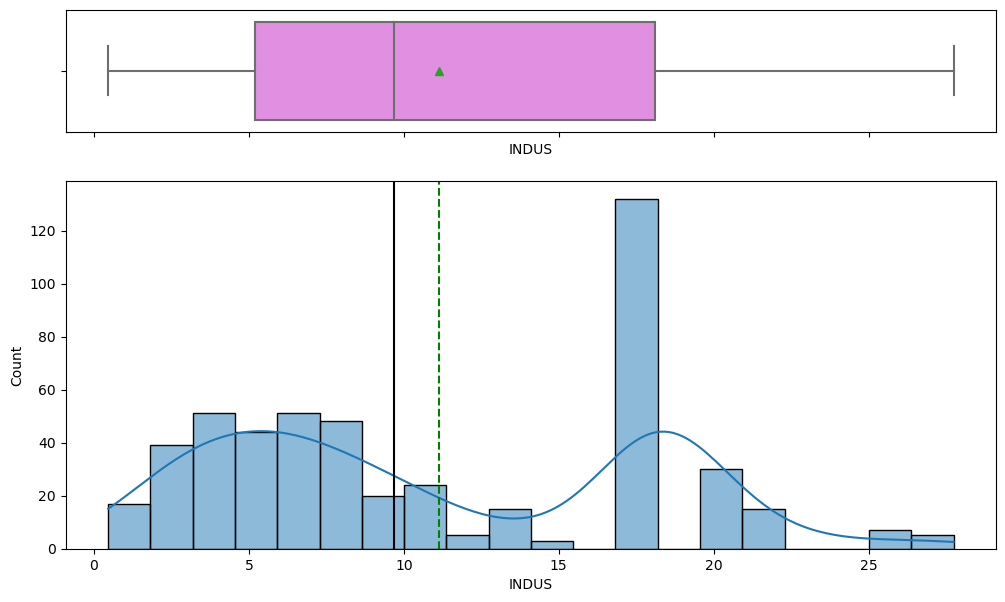

In [22]:
#Creating the histogram and boxplots for INDUS
histogram_boxplot(df, 'INDUS', kde = True, bins = 20)

- Makes sense, some areas will have more business than others

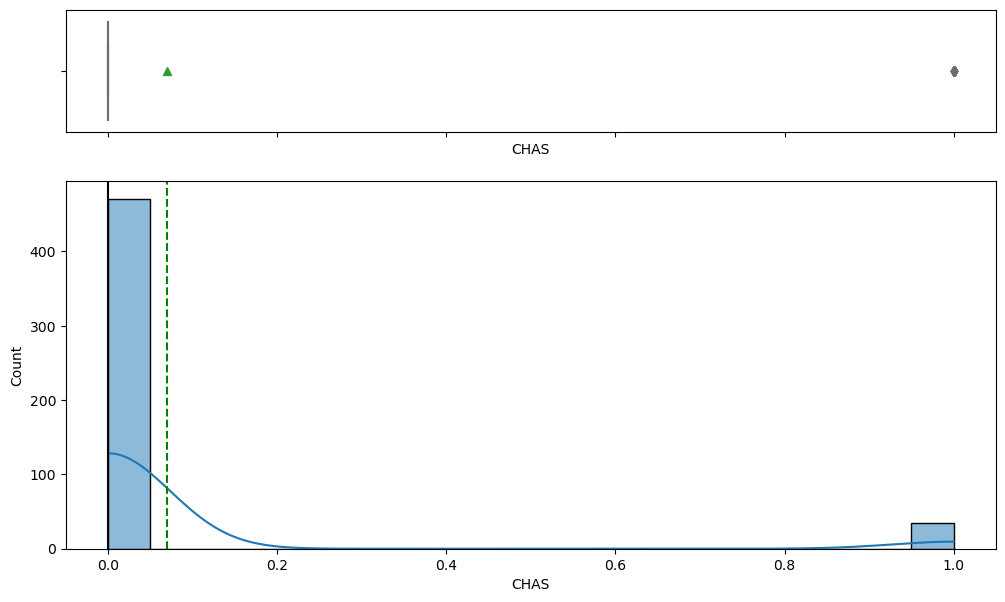

In [23]:
#Creating the histogram and boxplots for CHAS
histogram_boxplot(df, 'CHAS', kde = True, bins = 20)

- This also makes sense, more houses are not on the river

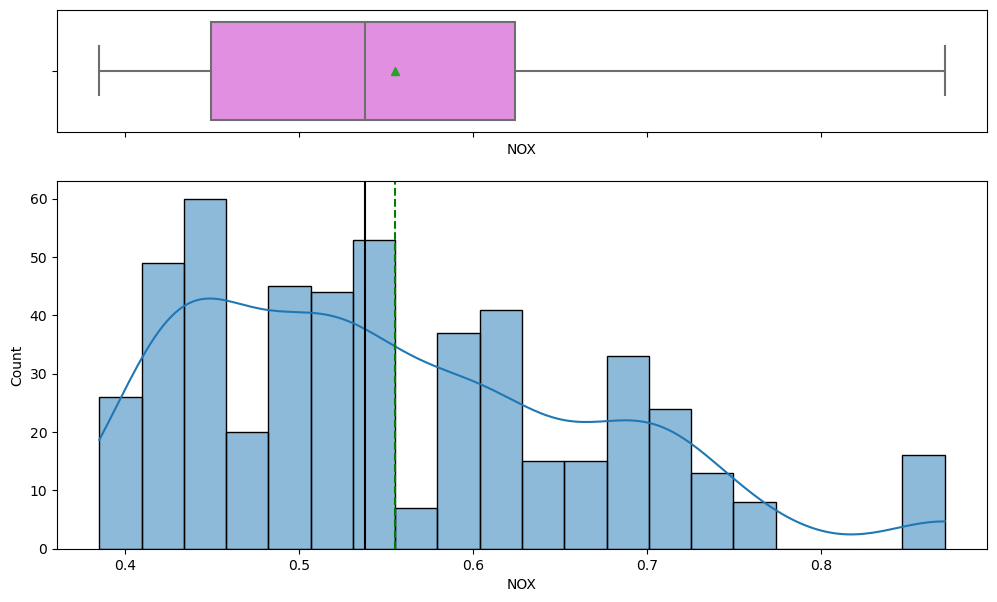

In [24]:
#Creating the histogram and boxplots for NOX
histogram_boxplot(df, 'NOX', kde = True, bins = 20)

- The nitric oxide cencentration probably depends on the town you are in and if it's in a better part of the city or not

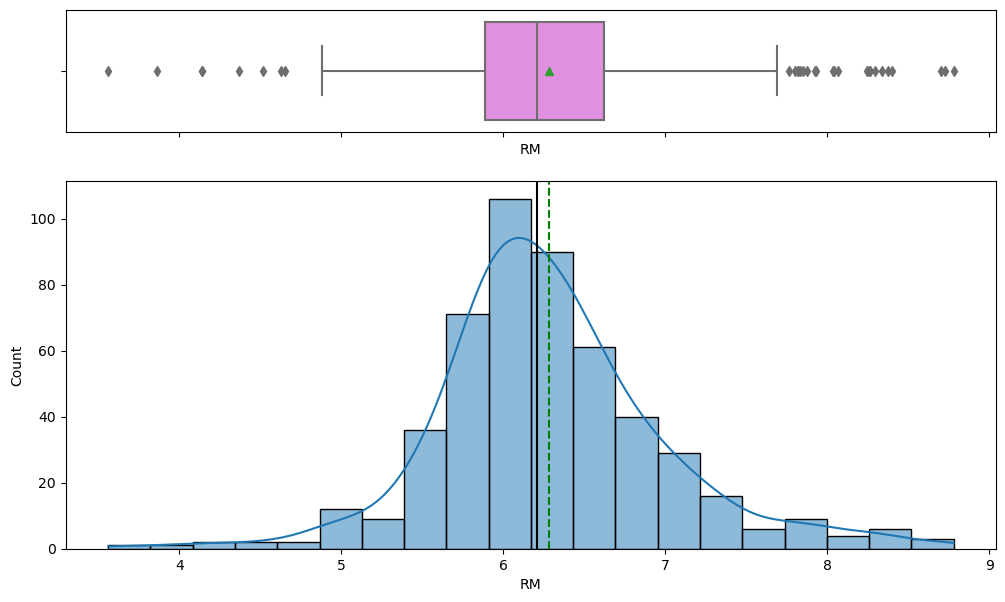

In [25]:
#Creating the histogram and boxplots for RM
histogram_boxplot(df, 'RM', kde = True, bins = 20)

- the average rooms per house are around 6. Makes sense that the more expensive houses would have more and the cheaper houses would have less

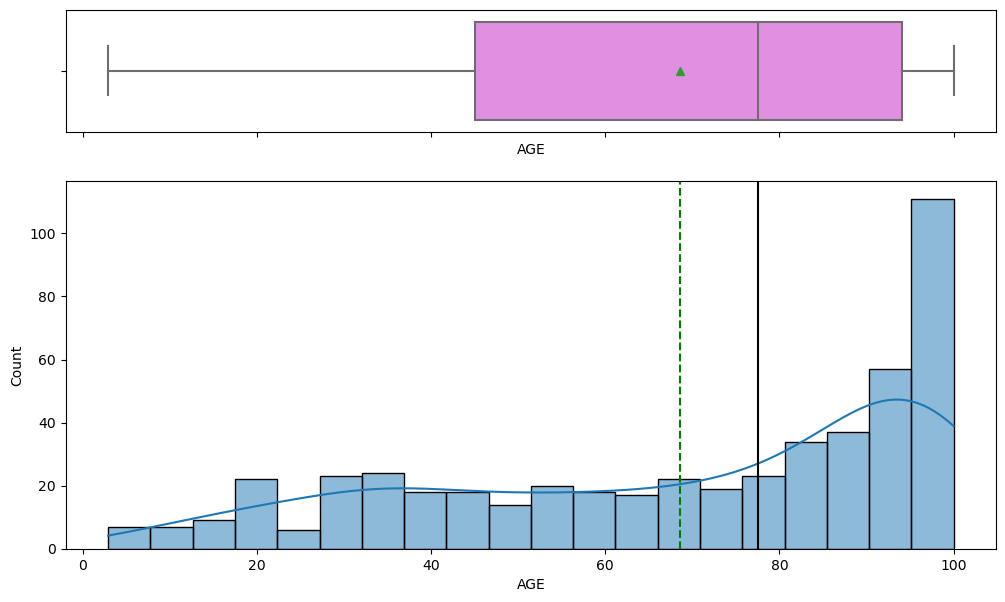

In [26]:
#Creating the histogram and boxplots for AGE
histogram_boxplot(df, 'AGE', kde = True, bins = 20)

- Boston is an older city so it would make sense that they have a lot of old houses

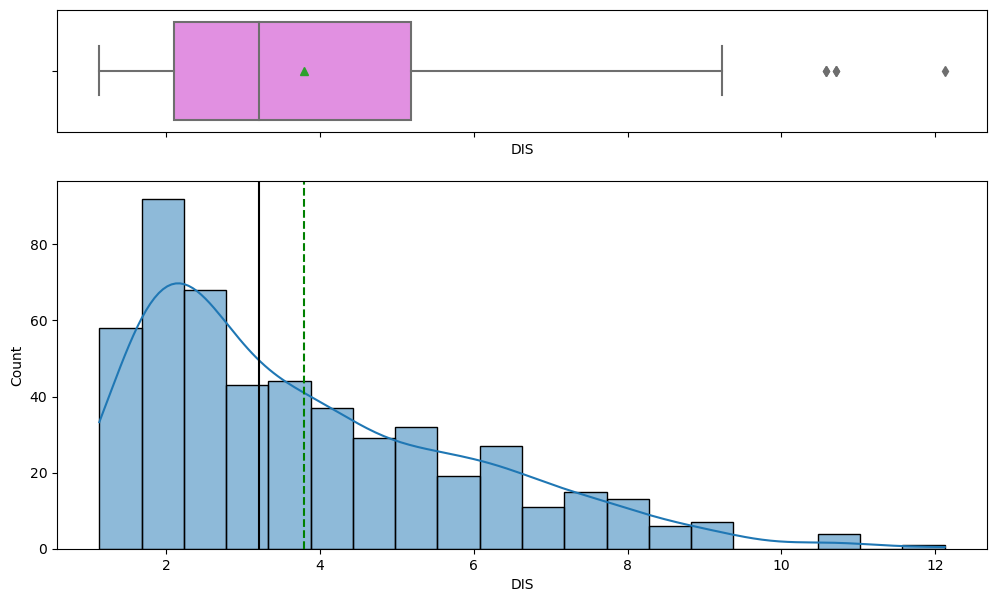

In [27]:
#Creating the histogram and boxplots for DIS
histogram_boxplot(df, 'DIS', kde = True, bins = 20)

- It looks like most people live close to the 5 boston employment centers
- The longer distances make sense if the city is growing or if people want to live farther away from downtown

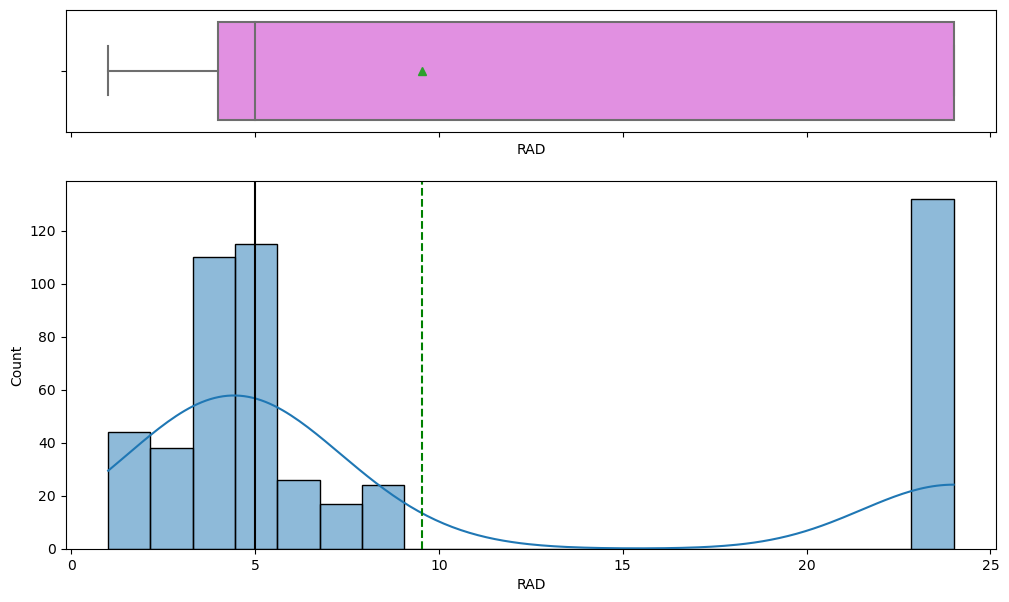

In [28]:
#Creating the histogram and boxplots for RAD
histogram_boxplot(df, 'RAD', kde = True, bins = 20)

- These outliers also seem fine. Some people live next to the highway and others don't. Depends on city planning and where your house is

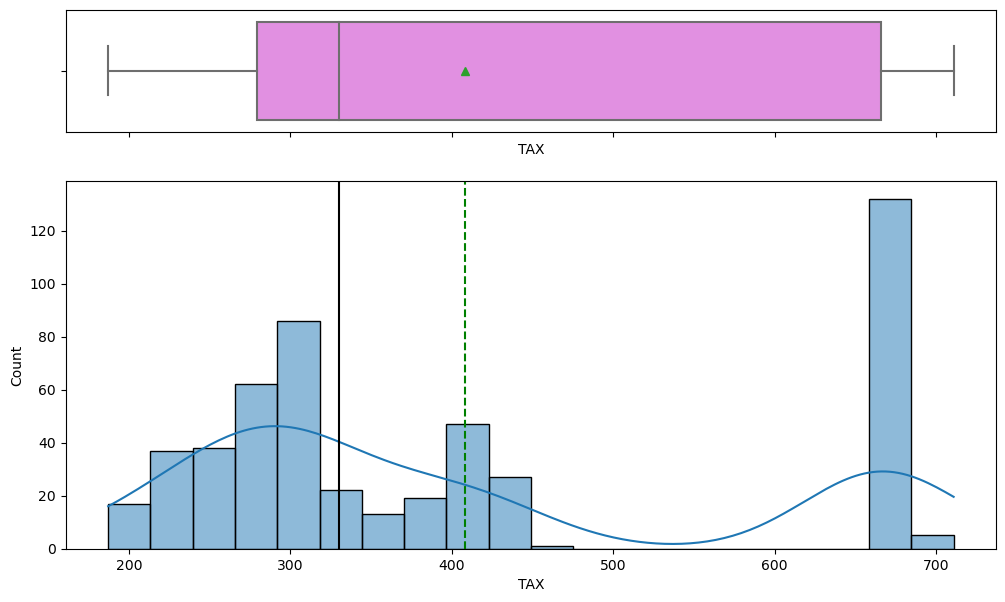

In [29]:
#Creating the histogram and boxplots for TAX
histogram_boxplot(df, 'TAX', kde = True, bins = 20)

- This also shows how some areas are more wealthy than others and their tax is higher.

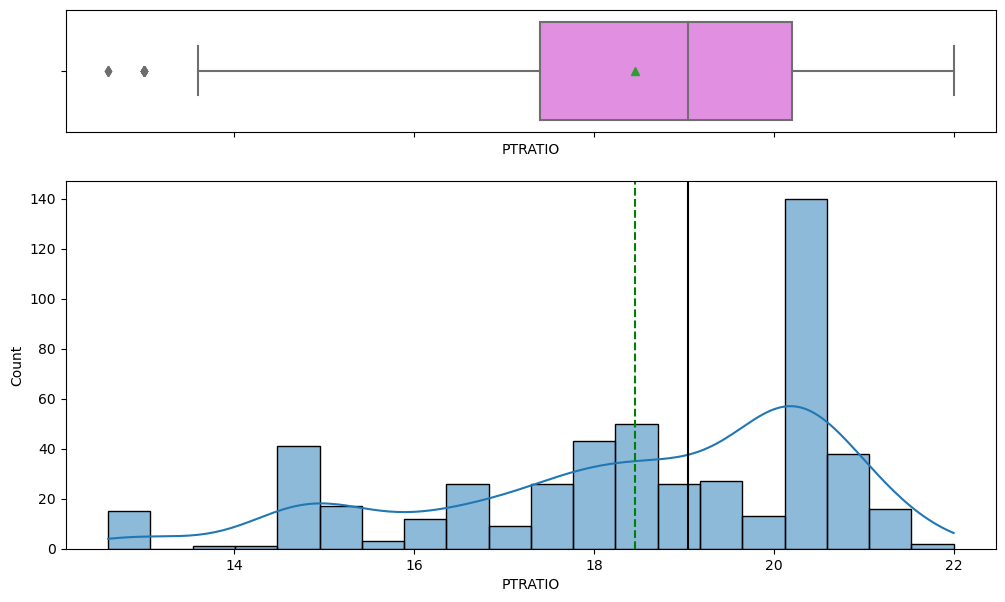

In [30]:
#Creating the histogram and boxplots for PTRATIO
histogram_boxplot(df, 'PTRATIO', kde = True, bins = 20)

- the wealthier areas probably have the lower ratio. Probably depends on public and private schools

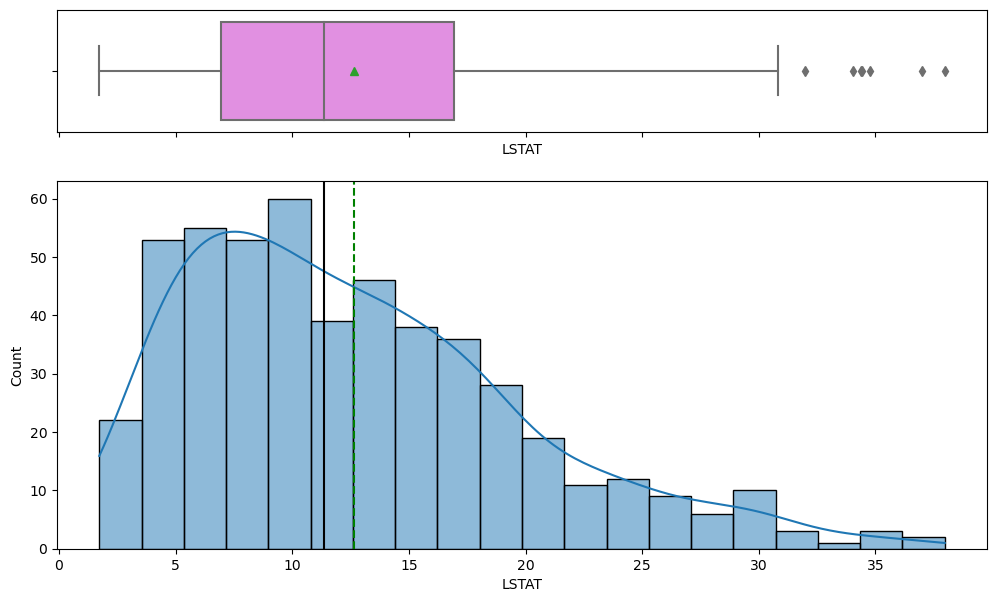

In [31]:
#Creating the histogram and boxplots for LSTAT
histogram_boxplot(df, 'LSTAT', kde = True, bins = 20)

- It looks like more people have less money.

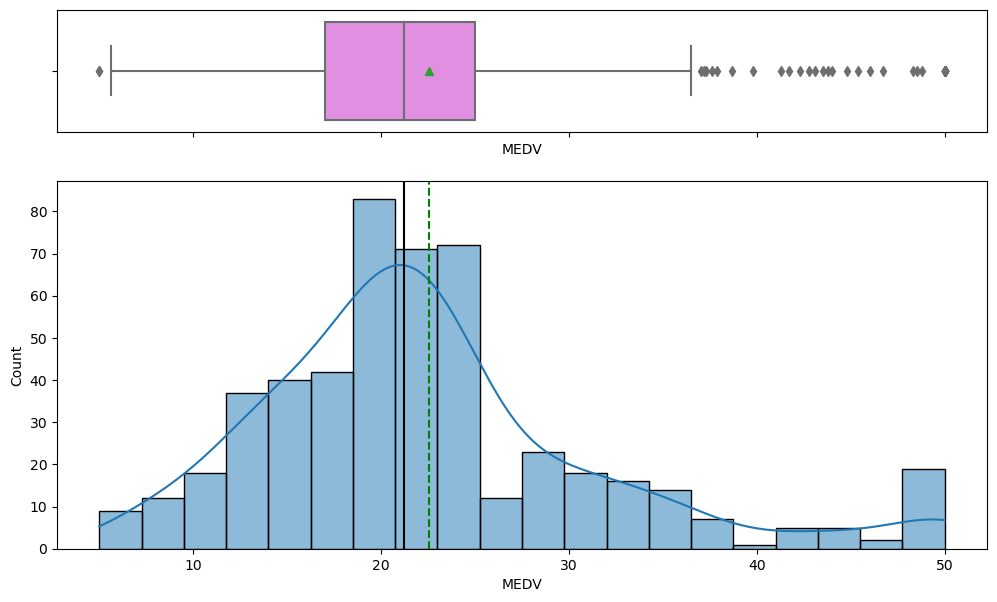

In [32]:
#Creating the histogram and boxplots for MEDV
histogram_boxplot(df, 'MEDV', kde = True, bins = 20)

- It looks like most houses are around the same price and the more expensive ones skew the data a little

In [33]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2


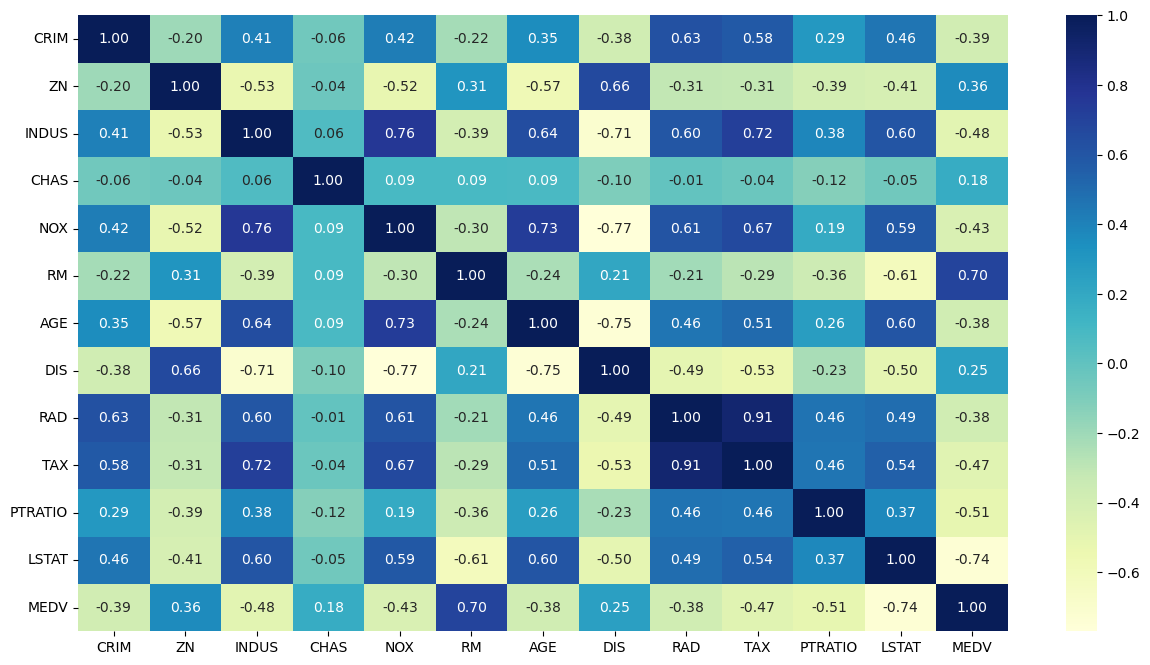

In [34]:
#Plotting the correlation between numberical variables
plt.figure(figsize = (15,8))

sns.heatmap(df.corr(), annot = True, fmt = '0.2f', cmap = 'YlGnBu')

plt.show()

Do bivariate analysis to visualize the relationship between the features having significant correlations (>= 0.7 or <= -0.7)

- INDUS and TAX
- INDUS and DIS
- INDUS and NOX
- NOX and DIS
- NOX and Age
- RM and MEDV
- AGE and DIS
- RAD and TAX
- LSTAT and MEDV

- It looks like the proportion of non-retail business acres per town has a positive relation to the full value property tax rate and the nitric oxide concentration; and a negative correlation to the distances to the employment centers
- It looks like NOX has a positive correlation to the age of the house; and a negative correlation to the distance to the employment centers
- Rooms and median value have a positive correlation
- Age and distance to the employment centers have a negative correlation
- RAD and TAX have a positive correlation
- LSTAT and MEDV have a negative correlation

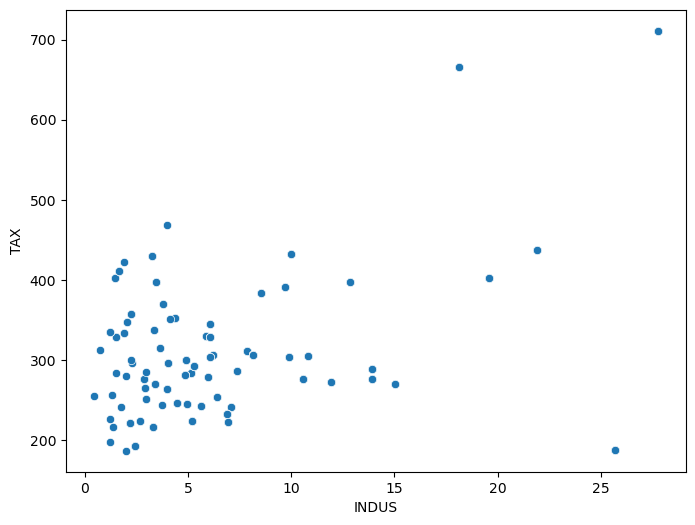

In [35]:
#Create scatterplot for INDUS and TAX
plt.figure(figsize = [8,6])
sns.scatterplot(x = df.INDUS, y = df.TAX)
plt.show()

- There is no clear line
- At first I wanted to say the less business the lower the tax but that doesn't hold up super well

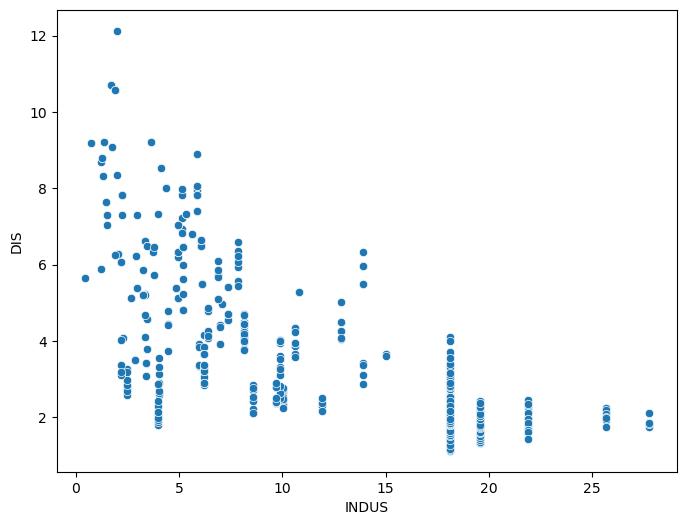

In [36]:
#Create scatterplot for INDUS and DIS
plt.figure(figsize = [8,6])
sns.scatterplot(x = df.INDUS, y = df.DIS)
plt.show()

- This looks like the more retail business there are the lower the distance to the 5 employment centers

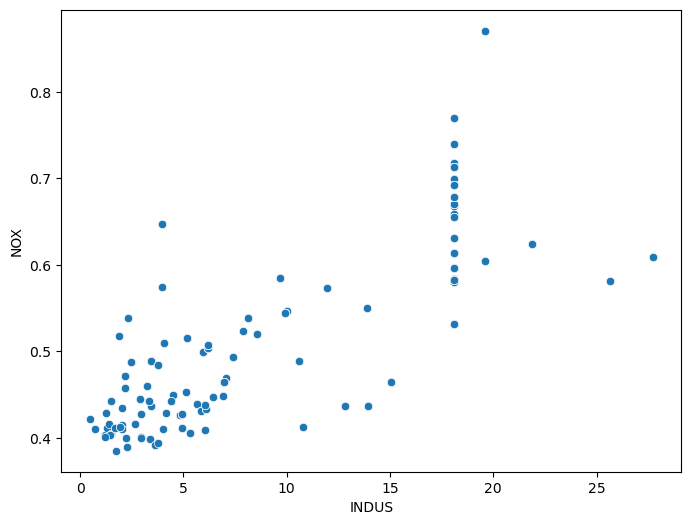

In [37]:
#Create scatterplot for INDUS and NOX
plt.figure(figsize = [8,6])
sns.scatterplot(x = df.INDUS, y = df.NOX)
plt.show()

- For the most part the more retail businesses the higher the level of nitric oxide

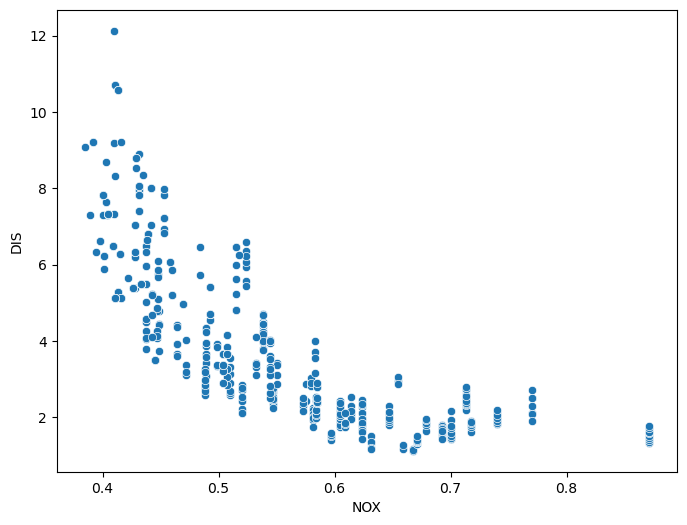

In [38]:
#Create scatterplot for NOX and DIS
plt.figure(figsize = [8,6])
sns.scatterplot(x = df.NOX, y = df.DIS)
plt.show()

- the higher the level of nitric oxide the closer you are to the employment centers

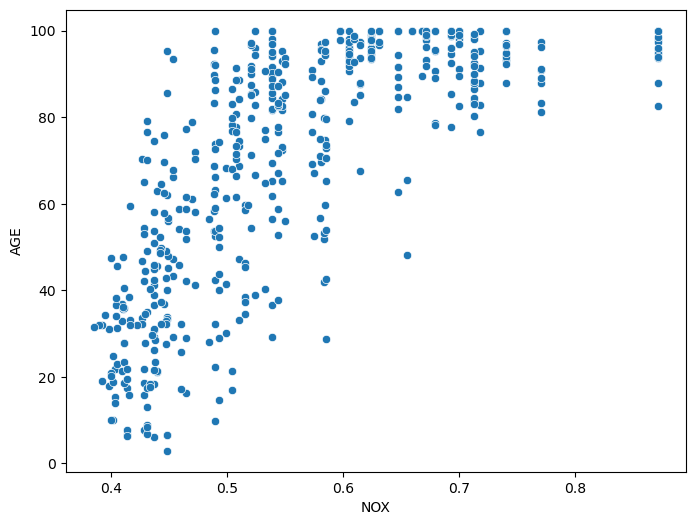

In [39]:
#Create scatterplot for NOX and AGE
plt.figure(figsize = [8,6])
sns.scatterplot(x = df.NOX, y = df.AGE)
plt.show()

- I would also say the older the house the higher the level of nitric oxide. The newer homes seem to have less

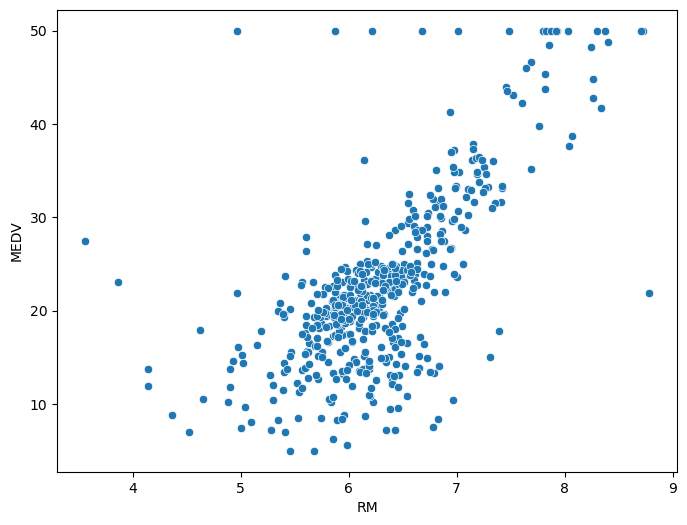

In [40]:
#Create scatterplot for RM and MEDV
plt.figure(figsize = [8,6])
sns.scatterplot(x = df.RM, y = df.MEDV)
plt.show()

- This shows the more rooms there are the higher the value of the home. This can also depend on the neighborhood it is in.

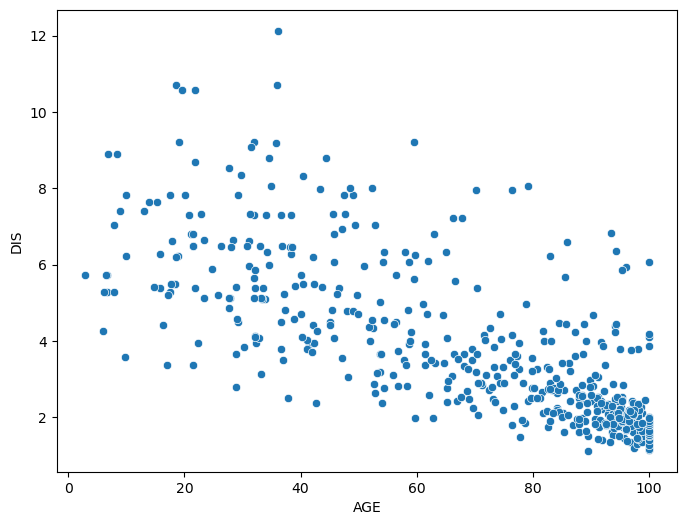

In [41]:
#Create scatterplot for AGE and DIS
plt.figure(figsize = [8,6])
sns.scatterplot(x = df.AGE, y = df.DIS)
plt.show()

- It appears the older the house the closer it is to the employment centers

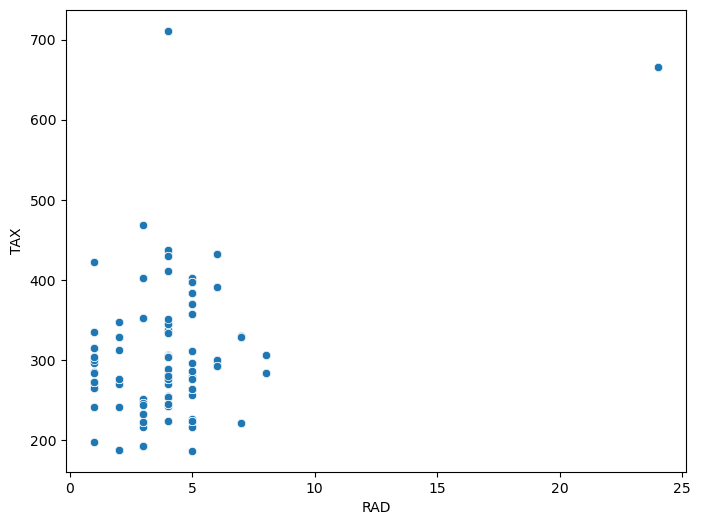

In [42]:
#Create scatterplot for RAD and TAX
plt.figure(figsize = [8,6])
sns.scatterplot(x = df.RAD, y = df.TAX)
plt.show()

- Hard to infer anything from the scatterplot

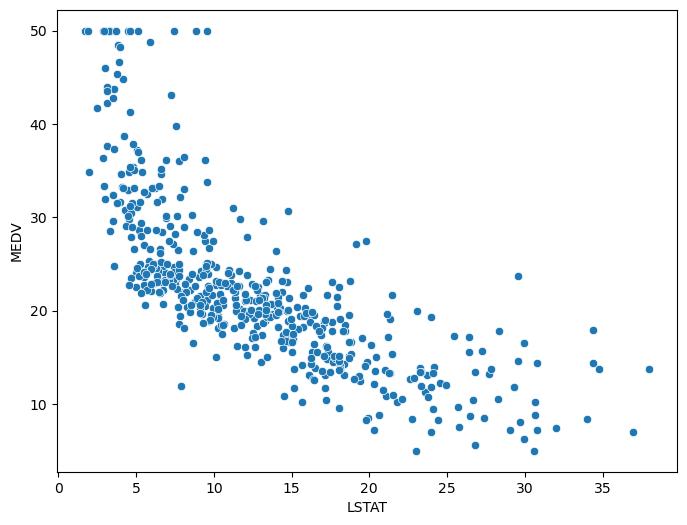

In [43]:
#Create scatterplot for LSTAT and MEDV
plt.figure(figsize = [8,6])
sns.scatterplot(x = df.LSTAT, y = df.MEDV)
plt.show()

- The people in the lower status of the population have a lower median home value

## Data Preprocessing

- Missing value treatment
- Log transformation of dependent variable if skewed
- Feature engineering (if needed)
- Outlier detection and treatment (if needed)
- Preparing data for modeling
- Any other preprocessing steps (if needed)

There are no missing values

In [44]:
#Log transformation of target variable
df['MEDV_log'] = np.log(df['MEDV'])

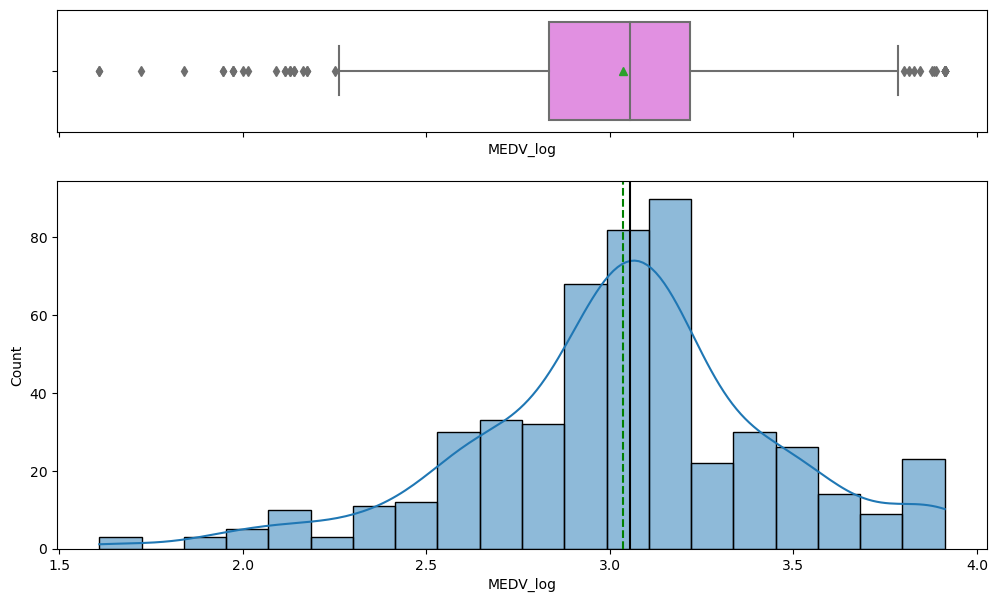

In [45]:
#Creating the histogram and boxplots for MEDV_log
histogram_boxplot(df, 'MEDV_log', kde = True, bins = 20)

- The median home value was slightly skewed so we did a log transformation.

Checking Outliers
- Outliers can be seen in boxplots above and below

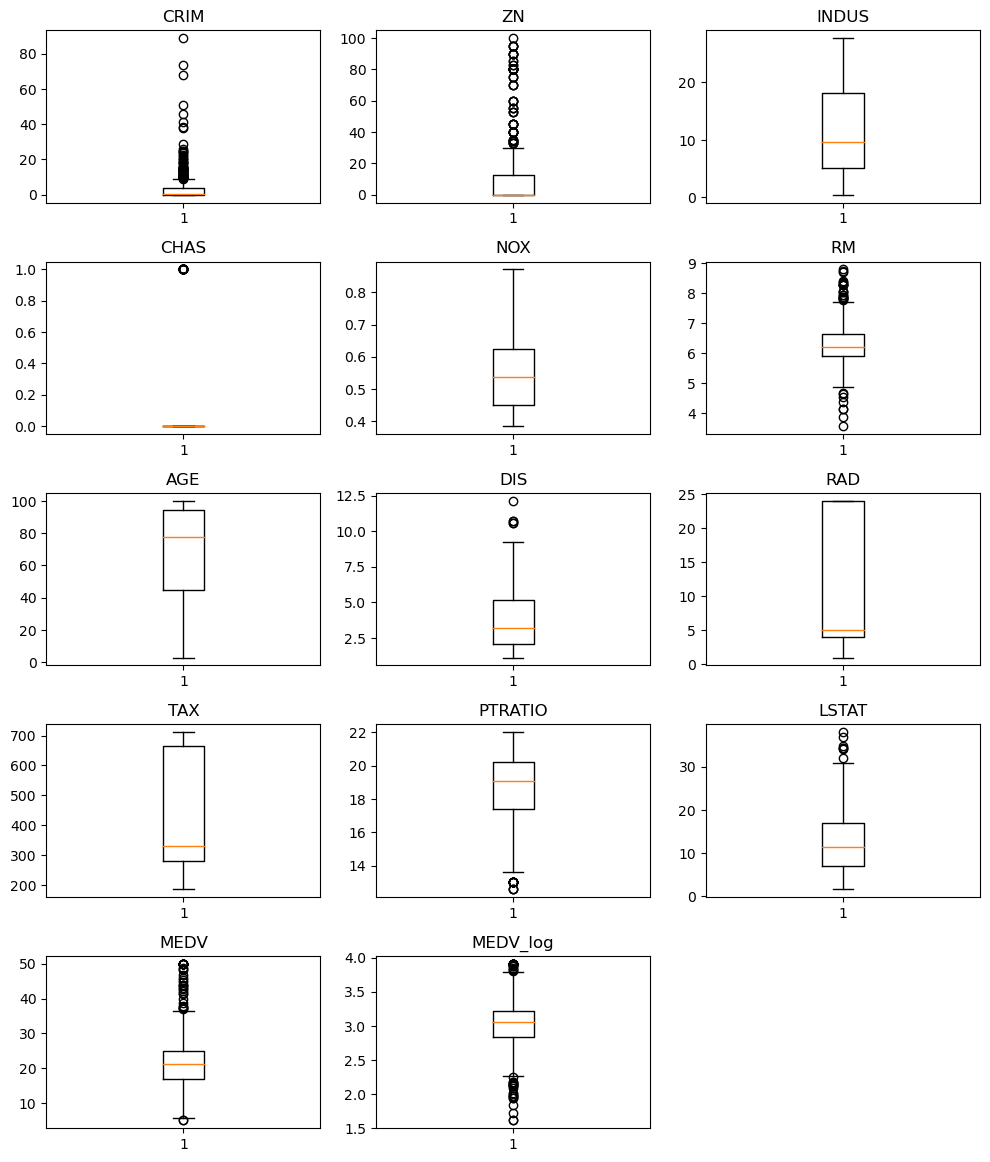

In [46]:
# Outlier detection using boxplot
numeric_columns = df.select_dtypes(include=np.number).columns.tolist()

plt.figure(figsize = (10, 30))

for i, variable in enumerate(numeric_columns):
    plt.subplot(13, 3, i + 1)
    plt.boxplot(df[variable], whis = 1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

In [47]:
#Separating the target variable and other variable

Y = df['MEDV_log']

X = df.drop(columns = ['MEDV', 'MEDV_log'])

In [48]:
# Add the intercept term
X = sm.add_constant(X)

In [49]:
X.head()

,const,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT
0,1.0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98
1,1.0,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14
2,1.0,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03
3,1.0,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94
4,1.0,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33


## Model Building - Linear Regression

In [50]:
#Splitting the data
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3, random_state = 1)

## Model Performance Check

In [51]:
#Calling the OLS algorithm on the train features and the target variable
ols_model_0 = sm.OLS(y_train, x_train)

#fitting the model
ols_res_0 = ols_model_0.fit()

print(ols_res_0.summary())

                            OLS Regression Results                            
Dep. Variable:               MEDV_log   R-squared:                       0.774
Model:                            OLS   Adj. R-squared:                  0.766
Method:                 Least Squares   F-statistic:                     97.19
Date:                Wed, 19 Jul 2023   Prob (F-statistic):          3.27e-102
Time:                        16:37:53   Log-Likelihood:                 80.575
No. Observations:                 354   AIC:                            -135.1
Df Residuals:                     341   BIC:                            -84.85
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.6856      0.241     19.404      0.0

- We can see the r-squared for the model is .774

Checking for multicollinearity

In [52]:
#checking variance inflation factor, Use Big Mart Sales Predictor, Line 37
vif_series = pd.Series(
    [variance_inflation_factor(x_train.values, i) for i in range(x_train.shape[1])],
    index = x_train.columns,
    dtype = float)

print("VIF Scores: \n\n{}\n".format(vif_series))

VIF Scores: 

const      535.372593
CRIM         1.924114
ZN           2.743574
INDUS        3.999538
CHAS         1.076564
NOX          4.396157
RM           1.860950
AGE          3.150170
DIS          4.355469
RAD          8.345247
TAX         10.191941
PTRATIO      1.943409
LSTAT        2.861881
dtype: float64



- Drop anything higher than 5 and run again
- Drop TAX first since it has the highest VIF score

In [53]:
x_train = x_train.drop('TAX', axis = 1)

In [54]:
#checking variance inflation factor
vif_series = pd.Series(
    [variance_inflation_factor(x_train.values, i) for i in range(x_train.shape[1])],
    index = x_train.columns,
    dtype = float)

print("VIF Scores: \n\n{}\n".format(vif_series))

VIF Scores: 

const      532.025529
CRIM         1.923159
ZN           2.483399
INDUS        3.270983
CHAS         1.050708
NOX          4.361847
RM           1.857918
AGE          3.149005
DIS          4.333734
RAD          2.942862
PTRATIO      1.909750
LSTAT        2.860251
dtype: float64



- No value is higher than 5 anymore

In [55]:
ols_model_1 = sm.OLS(y_train, x_train)

#fitting the model
ols_res_1 = ols_model_1.fit()

print(ols_res_1.summary())

                            OLS Regression Results                            
Dep. Variable:               MEDV_log   R-squared:                       0.769
Model:                            OLS   Adj. R-squared:                  0.761
Method:                 Least Squares   F-statistic:                     103.3
Date:                Wed, 19 Jul 2023   Prob (F-statistic):          1.40e-101
Time:                        16:37:54   Log-Likelihood:                 76.596
No. Observations:                 354   AIC:                            -129.2
Df Residuals:                     342   BIC:                            -82.76
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.6324      0.243     19.057      0.0

- Ran the model again to check P scores after removing multicollinearity
- Drop ZN, INDUS, and AGE because the P score is above .05

In [56]:
#Creating a new training variable without ZN INDUS or AGE
x_train1 = x_train.drop(['ZN', 'INDUS', 'AGE'], axis = 1)
x_test1 = x_test.drop(['ZN', 'INDUS', 'AGE', 'TAX'], axis = 1)

In [57]:
#checking variance inflation factor
vif_series = pd.Series(
    [variance_inflation_factor(x_train1.values, i) for i in range(x_train1.shape[1])],
    index = x_train1.columns,
    dtype = float)

print("VIF Scores: \n\n{}\n".format(vif_series))

VIF Scores: 

const      526.961418
CRIM         1.892679
CHAS         1.049602
NOX          3.528194
RM           1.748438
DIS          2.582254
RAD          2.838523
PTRATIO      1.591527
LSTAT        2.437311
dtype: float64



In [58]:
#Running a new model
ols_model_2 = sm.OLS(y_train, x_train1)

#fitting the model
ols_res_2 = ols_model_2.fit()

print(ols_res_2.summary())

                            OLS Regression Results                            
Dep. Variable:               MEDV_log   R-squared:                       0.767
Model:                            OLS   Adj. R-squared:                  0.762
Method:                 Least Squares   F-statistic:                     142.1
Date:                Wed, 19 Jul 2023   Prob (F-statistic):          2.61e-104
Time:                        16:37:54   Log-Likelihood:                 75.486
No. Observations:                 354   AIC:                            -133.0
Df Residuals:                     345   BIC:                            -98.15
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.6494      0.242     19.242      0.0

- All the VIF scores are less than 5 indicating no multicollinearity
- All the P values are less than .05

Checking the Rsquared, RSME, MAE, and MAPE

In [59]:
from sklearn.metrics import r2_score,mean_squared_error, mean_absolute_error
# Function to compute adjusted R-squared
def adj_r2_score(predictors, targets, predictions):
    r2 = r2_score(targets, predictions)
    n = predictors.shape[0]
    k = predictors.shape[1]
    return 1 - ((1 - r2) * (n - 1) / (n - k - 1))


# Function to compute MAPE
def mape_score(targets, predictions):
    return np.mean(np.abs(targets - predictions) / targets) * 100


# Function to compute different metrics to check performance of a regression model
def model_performance_regression(model, predictors, target):
    """
    Function to compute different metrics to check regression model performance

    model: regressor
    predictors: independent variables
    target: dependent variable
    """

    pred = model.predict(predictors)                  # Predict using the independent variables
    r2 = r2_score(target, pred)                       # To compute R-squared
    adjr2 = adj_r2_score(predictors, target, pred)    # To compute adjusted R-squared
    rmse = np.sqrt(mean_squared_error(target, pred))  # To compute RMSE
    mae = mean_absolute_error(target, pred)           # To compute MAE
    mape = mape_score(target, pred)                   # To compute MAPE

    # Creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "RMSE": rmse,
            "MAE": mae,
            "R-squared": r2,
            "Adj. R-squared": adjr2,
            "MAPE": mape,
        },
        index=[0],
    )

    return df_perf

In [60]:
print("Performance on train data: ")
model_performance_regression(ols_res_2, x_train1, y_train)

Performance on train data: 


,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.195504,0.143686,0.767174,0.761082,4.981813


In [61]:
print("Performance on test data: ")
model_performance_regression(ols_res_2, x_test1, y_test)

Performance on test data: 


,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.198045,0.151284,0.772486,0.758066,5.257965


* Observations:

- The RMSE for the train and test data are practically identical.
- The MAE shows we can predict the MEDV_log within .151 of the actual value
- The MAPE is around 5% on the test data, indicating the average difference between the predicted value and the actual value is 5%
- The model is not overfitting according to the R-squared values

In [62]:
#Check the model using cross validation

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

linearregression = LinearRegression() 

cv_Score11 = cross_val_score(linearregression, x_train1, y_train, cv = 10)

cv_Score12 = cross_val_score(linearregression, x_train1, y_train, cv = 10, 
                             scoring = 'neg_mean_squared_error')                                  


print("RSquared: %0.3f (+/- %0.3f)" % (cv_Score11.mean(), cv_Score11.std()*2))

print("Mean Squared Error: %0.3f (+/- %0.3f)" % (-1*cv_Score12.mean(), cv_Score12.std()*2))

RSquared: 0.729 (+/- 0.232)
Mean Squared Error: 0.041 (+/- 0.023)


In [63]:
print(ols_res_2.rsquared)

0.7671737057912822


- The RSquared from cross validation and from ols_res_2 are close and suggest a relatively good fit

## Checking Linear Regression Assumptions

Checking the residual

In [64]:
#residual
residual = ols_res_2.resid

In [65]:
residual.mean()

-3.2873891932544888e-15

- the mean of residuals is very close to 0. The corresponding assumption is satisfied.

Plot histogram of residuals

<Axes: xlabel='MEDV_log', ylabel='Count'>

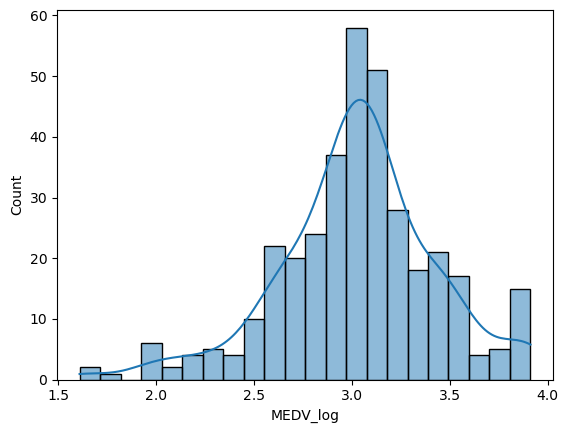

In [66]:
sns.histplot(y_train, kde = True)

The error terms are normally distributed. Might be slightly skewed left

Checking the homeoscedasticity

In [67]:
#Check for homeoscedasticity

import statsmodels.stats.api as sms
from statsmodels.compat import lzip

name = ["F statistic", "p-value"]
test = sms.het_goldfeldquandt(residual, x_train)
lzip(name, test)

[('F statistic', 1.0861248884874883), ('p-value', 0.2981482892904743)]

- The p-value is greater than .05. We fail to reject the null-hypothesis, so the residuals are homoscedastic.

Check the linearity of variables

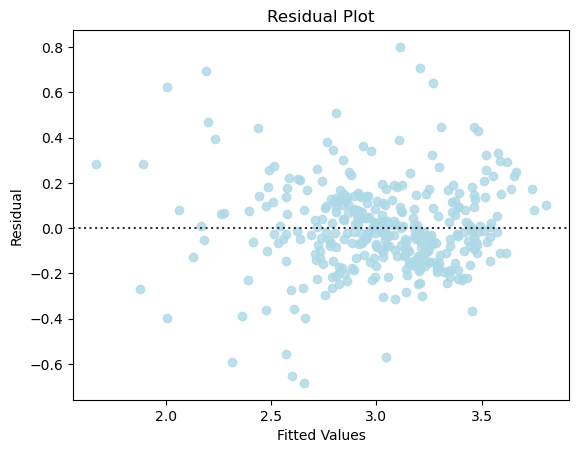

In [68]:
#Predicted Values
fitted = ols_res_2.fittedvalues

#Plotting Residuals VS Fitted Vales
sns.residplot(x = fitted, y = y_train, color = 'lightblue')
plt.xlabel('Fitted Values')
plt.ylabel('Residual')
plt.title('Residual Plot')
plt.show()

- There is no pattern in the residuals vs fitted values scatter plot, the linearity assumption is satisfied

## Final Model

In [69]:
coef = ols_res_2.params

coef

const      4.649386
CRIM      -0.012500
CHAS       0.119773
NOX       -1.056225
RM         0.058907
DIS       -0.044069
RAD        0.007848
PTRATIO   -0.048504
LSTAT     -0.029277
dtype: float64

In [70]:
#The equation of the model
equation = "MEDV_Log ="
print(equation, end = '\t')
for i in range(len(coef)):
    print('(', coef[i], ') * ', coef.index[i], '+', end = ' ')

MEDV_Log =	( 4.6493858232666305 ) *  const + ( -0.012500455079104083 ) *  CRIM + ( 0.11977319077019499 ) *  CHAS + ( -1.056225351668324 ) *  NOX + ( 0.05890657510928002 ) *  RM + ( -0.044068890799405465 ) *  DIS + ( 0.007848474606243612 ) *  RAD + ( -0.0485036207949985 ) *  PTRATIO + ( -0.029277040479796713 ) *  LSTAT + 

## Actionable Insights and Recommendations 

- It looks like the CHAS value has the highest coefficient, so if you want to find more expensive houses you should look for houses near the river
- The nitric oxide levels seem to have the worst effect on house prices so try to find neighborhoods with lower levels.
- The amount of rooms and the accessibility to radial highways are the other two columns that had a positive affect on house prices.
- Crime rate, distance to employment centers, pupil teacher ratio, and the lower status of population all have negative affects on house prices.
- To find the best house I would look for one on the river that has more rooms, is close to the highway, and has the lowest level of nitric oxide as possible.
- To find the worst house I would stay away from the river and find the highest concentration of nitric oxide, is as far as possible from the employment centers, and has the highest pupil to teacher ratio.


___